In [12]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-22 03:25:57 +07:00)


In [13]:
train_ds = pd.read_csv("./train_ds_big_process.csv")
test_ds = pd.read_csv("./test_ds_big_process.csv")

time: 31 ms (started: 2023-05-22 03:25:57 +07:00)


In [14]:
X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]


time: 0 ns (started: 2023-05-22 03:25:58 +07:00)


In [15]:
from sklearn import metrics


time: 0 ns (started: 2023-05-22 03:25:58 +07:00)


In [16]:
def metric_for_evalue_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"R2 = {r2}")
    print(f"RMSE = {rmse}")

time: 0 ns (started: 2023-05-22 03:25:58 +07:00)


In [17]:
def plot_residuals(y_test, y_pred):
    indexes = list(range(1, 150+1))[:150]
    fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
    axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
    axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
    axs.legend()
    axs.set_ylabel('Price')
    fig.suptitle('Predicted Price VS Actual Price')
    plt.show()

time: 0 ns (started: 2023-05-22 03:25:58 +07:00)


Random Forest Regressor


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

RandomForestRegressor()

MAE = 2640637.031104024
MSE = 67671939514254.95
R2 = 0.7901400469637037
RMSE = 8226295.613108913
time: 969 ms (started: 2023-05-22 03:25:58 +07:00)


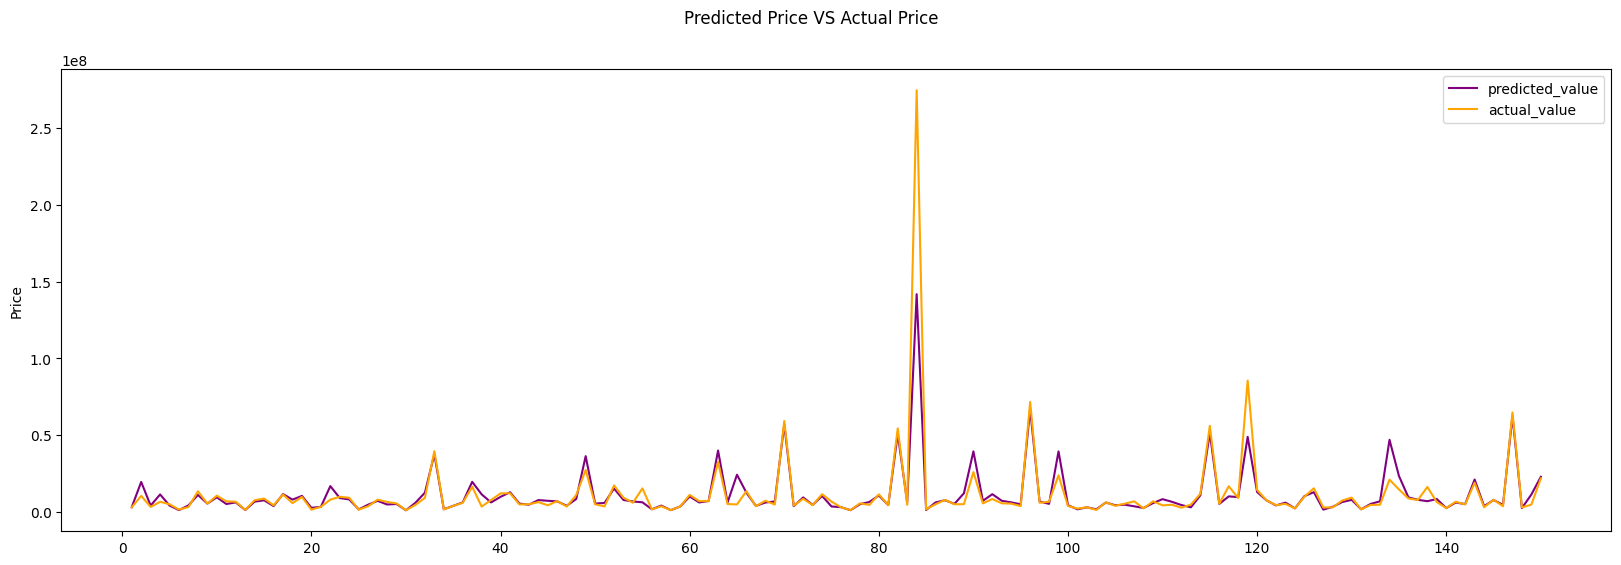

time: 188 ms (started: 2023-05-22 03:25:59 +07:00)


In [19]:
plot_residuals(y_test, y_pred)

In [21]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_pars = grid_search.best_params_

print('Best hyperparameters: ', best_pars)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
time: 1min 50s (started: 2023-05-22 03:39:26 +07:00)


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, random_state=0)

MAE = 3467595.16090976
MSE = 81642595130820.02
R2 = 0.746815130423355
RMSE = 9035629.205031602


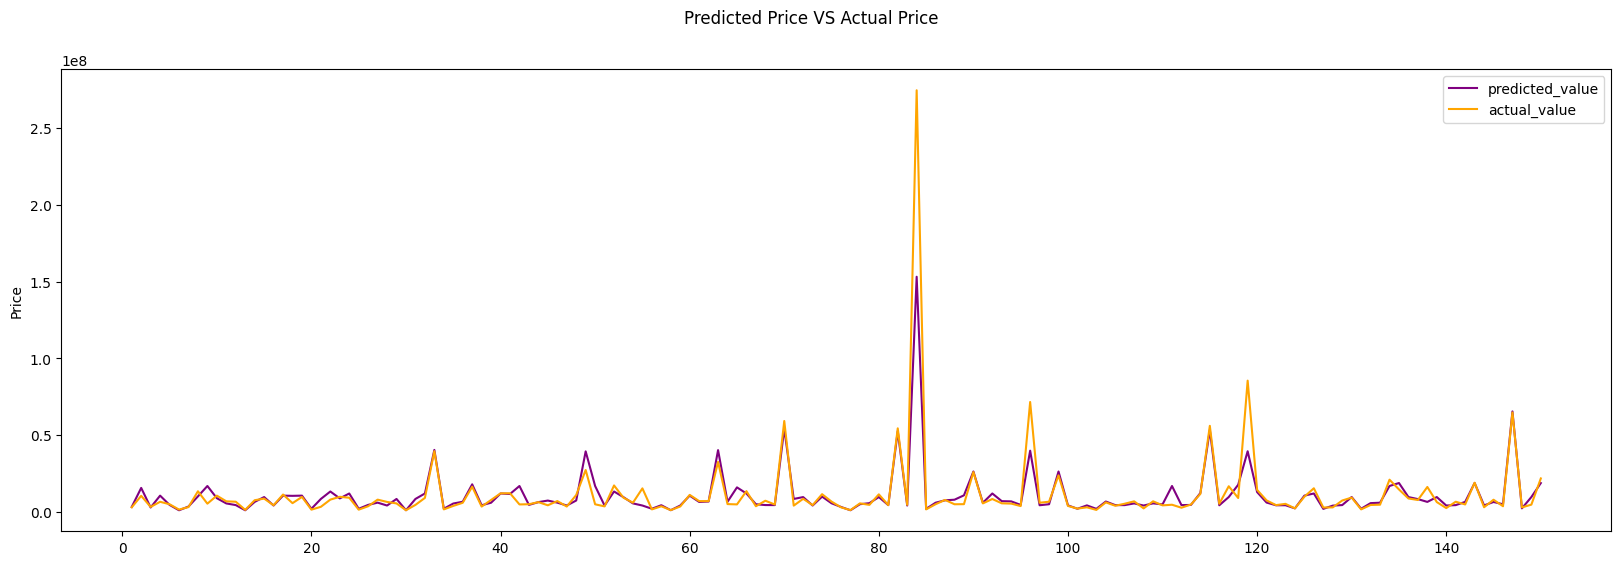

time: 781 ms (started: 2023-05-22 03:24:54 +07:00)


In [ ]:
rf = RandomForestRegressor(random_state=0, max_depth=best_pars['max_depth'], min_samples_split=best_pars[
                           'min_samples_split'], min_samples_leaf=best_pars['min_samples_leaf'], max_features=best_pars['max_features'])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

In [ ]:
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)

# clf.best_params_

c = 0.01
penalty = 'none'

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none']})

time: 32.6 s (started: 2023-05-22 02:30:39 +07:00)


LogisticRegression(C=0.01, penalty='none')

MAE = 4691396.0875
MSE = 144725444821052.8
R2 = 0.5134311316875881
RMSE = 12030188.893822607


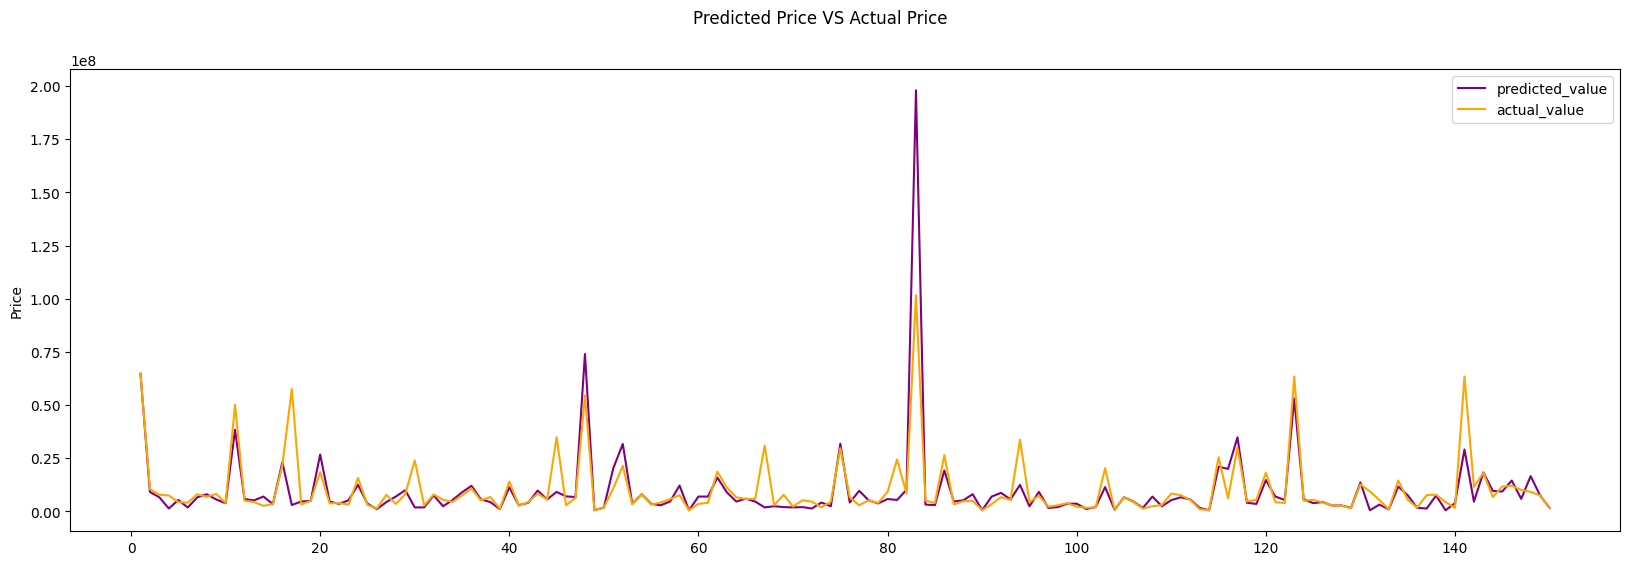

time: 1min 17s (started: 2023-05-22 02:39:03 +07:00)


In [ ]:
logistic = LogisticRegression(penalty='none',C=0.01)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)